# Homework : 2 Machine Learning - 1 (Supervised Methods)

## 2. C-class nearest-means classifier (NMC), for C classes and D features.

### a] Run it on the given dataset. There are C = 5 classes and D = 7 features. Report the classification accuracy on the training set and test set.

### Importing Necessary Libraries

In [1]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing the nearestMeansClassifier library from utils package.
from utils import nearestMeansClassifier

#Importing the plotGraph library to plot CER vs m
from utils import plotGraph as pg

### Loading the Training Data and Testing Data from HW2_Datasets using Pandas

In [2]:
train_data = pd.read_csv("./HW2_Datasets/HW2_train_set.csv")
print("Train Data: ")
print(train_data.head())
print()

test_data = pd.read_csv("./HW2_Datasets/HW2_test_set.csv")
print("Test Data: ")
print(test_data.head())

Train Data: 
         X1        X2        X3        X4        X5        X6        X7  Class
0  3.331309  0.199388  0.511930  3.546394  3.501046 -0.988523  1.424119      4
1  4.923320  1.714349 -1.733554  3.908366  1.779802 -0.928249  0.307568      0
2  3.480943  0.472072 -1.566615  4.244122  0.010020 -2.899989  0.706875      0
3  1.297407  2.025849  5.609849  1.759304  3.795999  4.919387  0.545626      2
4  4.540691 -1.005979 -3.846193  4.729157  2.783594 -1.138115  0.467317      0

Test Data: 
         X1        X2        X3        X4        X5        X6        X7  Class
0  0.461124  0.088944  1.912568  0.419696 -0.228390 -1.840807  1.634009      4
1  1.853865  6.754218  3.936953  4.412639  2.596076 -4.091204  5.054838      3
2  6.290771  2.560742  0.338448  4.649877  2.621144 -0.462739 -2.035173      0
3  4.253980  1.126030 -1.857628  4.088797  3.687401 -2.316638 -1.810089      0
4  0.280335  3.315180  5.771898  1.051240  1.938454  4.384316  2.662093      2


### Instantiating objects for <strong> <em> NearestMeansClassifier() class </strong> </em> one for <strong> <em> train_data </strong> </em>.

In [3]:
nmc_1 = nearestMeansClassifier.NearestMeansClassifier()

In [4]:
X_train, n_train, T_train = nmc_1.generateData(data=train_data)

class_means = nmc_1.calculateClassMeans(X=X_train)
print("---------------------------------------------------")
print(f"  Shape of sample_means: {class_means.shape}")
# print(f"  Sample Means: ")
# print(class_means)
print("---------------------------------------------------")

Y_hat_train = nmc_1.classify(X=X_train, sample_means=class_means)

CER_train = nmc_1.calculateCER(T=T_train, Y_hat=Y_hat_train, percentageFlag=True)

accuracy_train = nmc_1.calculateAccuracy(T=T_train, Y_hat=Y_hat_train, percentageFlag=True)

print(f"Classification Error Rate for the training set of dataset-1 is: {CER_train}%")
print(f"Accuracy for the training set of dataset-1 is: {accuracy_train}%")



---------------------------------------------------
  Shape of Input Data: (1050, 8)
  Number of Data Points: 1050
  Number of Input Features: 7
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  Shape of sample_means: (5, 7)
---------------------------------------------------
Classification Error Rate for the training set of dataset-1 is: 14.761904761904763%
Accuracy for the training set of dataset-1 is: 85.23809523809524%


### (b) i] For visualization, run it again using only the following 2 features: X1 and X2. Plot in 2D feature space: the training data, decision boundaries, and decision regions for all the classes.

In [5]:
nmc_2features = nearestMeansClassifier.NearestMeansClassifier()

In [6]:
feature1 = 1
feature2 = 2
X_train, n_train, T_train = nmc_2features.generateData(data=train_data)

X_train_2features_1 = nmc_2features.generateTrainDataWith2Features(feature1, feature2, X_train, printFlag=True)

class_means_2features_1 = nmc_2features.calculateClassMeans(X=X_train_2features_1)
print("---------------------------------------------------")
print(f"  Shape of sample_means: {class_means_2features_1.shape}")
print(f"  Sample Means: ")
print(class_means_2features_1)
print("---------------------------------------------------")

Y_hat_train_2features_1 = nmc_2features.classify(X=X_train_2features_1, sample_means=class_means_2features_1)

CER_train_2features_1 = nmc_2features.calculateCER(T=T_train, Y_hat=Y_hat_train_2features_1, percentageFlag=True)

accuracy_train_2features_1 = nmc_2features.calculateAccuracy(T=T_train, Y_hat=Y_hat_train_2features_1, percentageFlag=True)

print(f"Classification Error Rate for the training set of dataset-1 is: {CER_train_2features_1}%")
print(f"Accuracy for the training set of dataset-1 is: {accuracy_train_2features_1}%")


---------------------------------------------------
  Shape of Input Data: (1050, 8)
  Number of Data Points: 1050
  Number of Input Features: 7
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  After retaining only 2 features [1 and 2]: 
  Shape of X_train_2_features: (1050, 2)
  Number of Data Points: 1050
  Number of Input Features: 2
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  Shape of sample_means: (5, 2)
  Sample Means: 
[[4.28147871 1.20108426]
 [3.22972494 1.07643941]
 [0.7851701  2.7408094 ]
 [4.14645713 4.27985188]
 [2.76907036 1.76295742]]
---------------------------------------------------
Classification Error Rate for the training set of dataset-1 is: 49.142857142857146%
Accuracy for the training set of dataset-1 is: 50.857142857142854%


### b] ii] Plotting Decsision Boundaries for the X_train_2features_1 (X1 and X2)

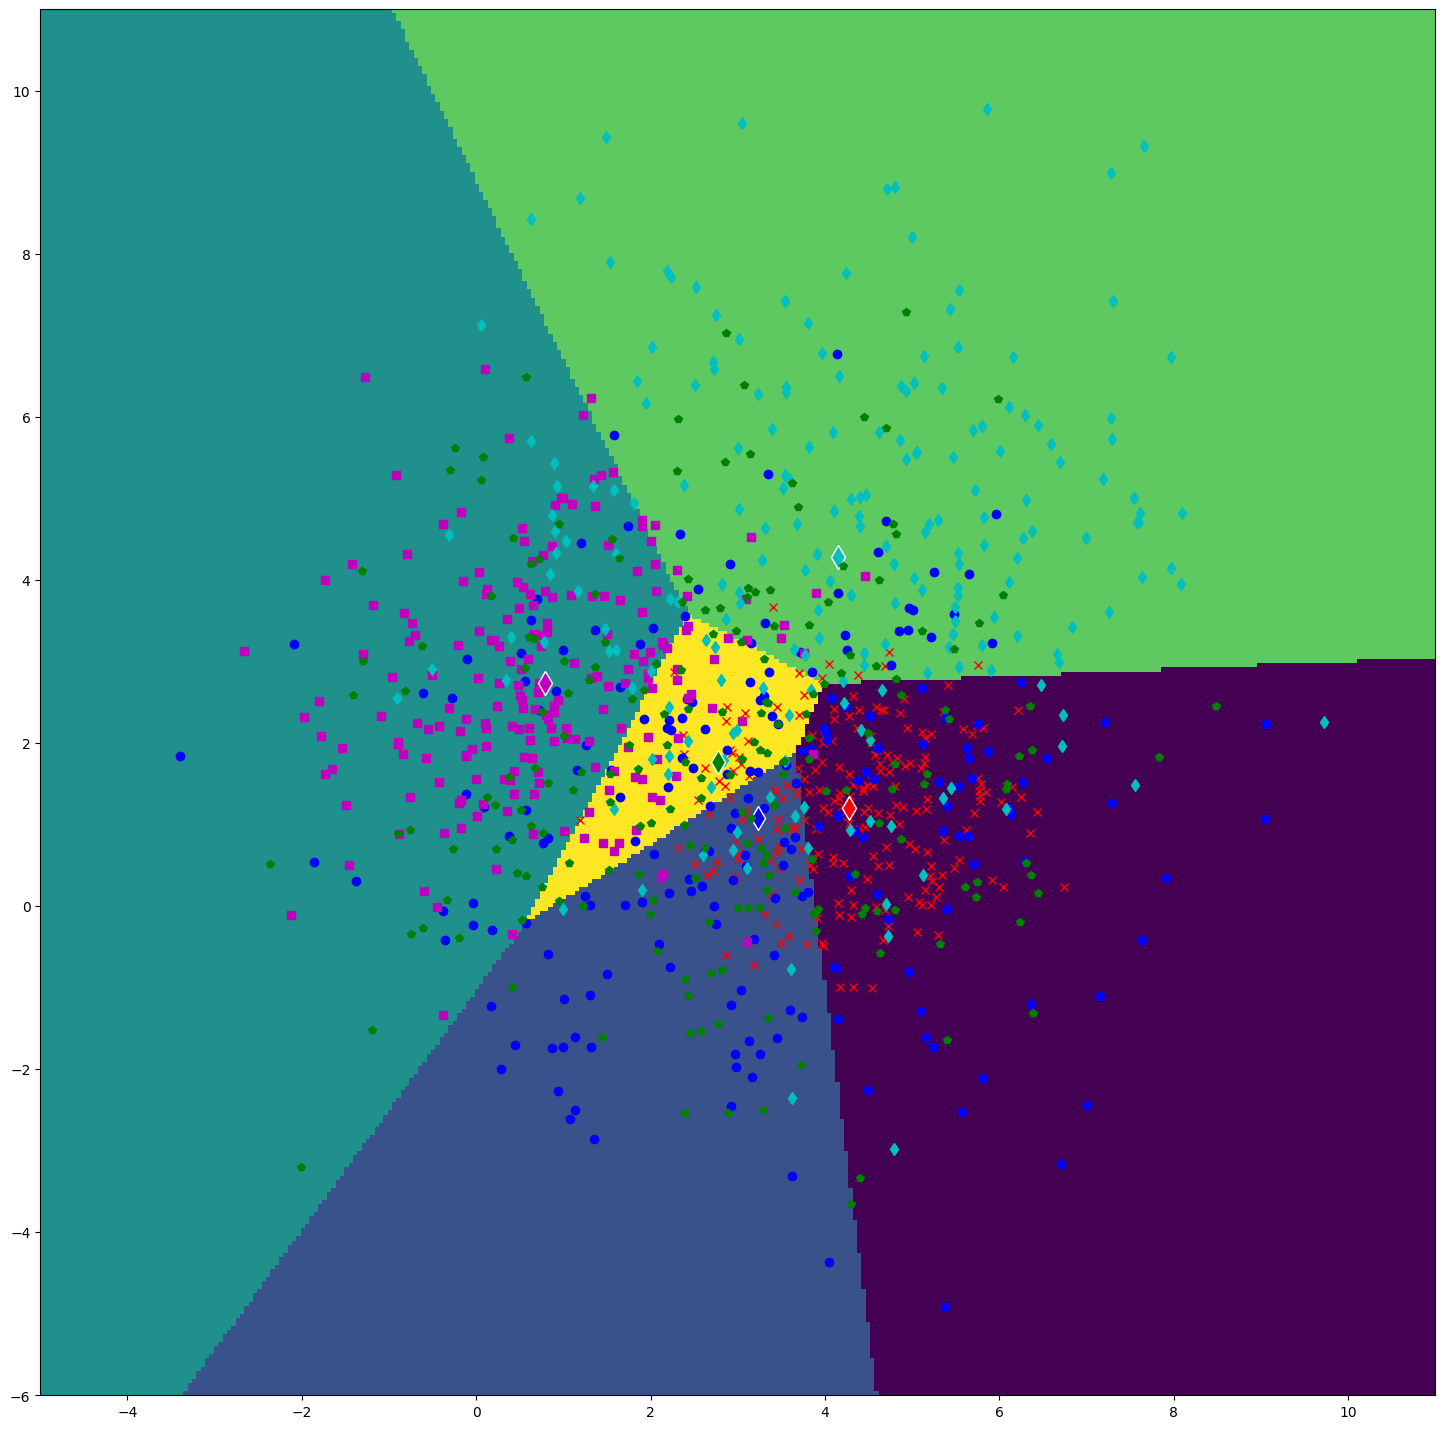

In [7]:
nmc_2features.plotDecisionBoundaries_2(training=X_train_2features_1, label_train=T_train, sample_mean=class_means_2features_1, fsize=(18,18))

### (c) i] For visualization, run it again using only the following 2 features: X3 and X4. Plot in 2D feature space: the training data, decision boundaries, and decision regions for all the classes.

In [8]:
nmc_2features = nearestMeansClassifier.NearestMeansClassifier()

feature1 = 3
feature2 = 4
X_train, n_train, T_train = nmc_2features.generateData(data=train_data)

X_train_2features_2 = nmc_2features.generateTrainDataWith2Features(feature1, feature2, X_train, printFlag=True)

class_means_2features_2 = nmc_2features.calculateClassMeans(X=X_train_2features_2)
print("---------------------------------------------------")
print(f"  Shape of sample_means: {class_means_2features_2.shape}")
print(f"  Sample Means: ")
print(class_means_2features_2)
print("---------------------------------------------------")

Y_hat_train_2features_2 = nmc_2features.classify(X=X_train_2features_2, sample_means=class_means_2features_2)

CER_train_2features_2 = nmc_2features.calculateCER(T=T_train, Y_hat=Y_hat_train_2features_2, percentageFlag=True)

accuracy_train_2features_2 = nmc_2features.calculateAccuracy(T=T_train, Y_hat=Y_hat_train_2features_2, percentageFlag=True)

print(f"Classification Error Rate for the training set of dataset-1 is: {CER_train_2features_2}%")
print(f"Accuracy for the training set of dataset-1 is: {accuracy_train_2features_2}%")

---------------------------------------------------
  Shape of Input Data: (1050, 8)
  Number of Data Points: 1050
  Number of Input Features: 7
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  After retaining only 2 features [3 and 4]: 
  Shape of X_train_2_features: (1050, 2)
  Number of Data Points: 1050
  Number of Input Features: 2
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  Shape of sample_means: (5, 2)
  Sample Means: 
[[-1.37040891  4.63625254]
 [ 2.07045979  2.55846495]
 [ 5.01696957  1.00526839]
 [ 3.28154766  4.44752838]
 [-0.67844556  2.8697092 ]]
---------------------------------------------------
Classification Error Rate for the training set of dataset-1 is: 39.04761904761905%
Accuracy for the training set of dataset-1 is: 60.952380952380956%


### c] ii] Plotting Decsision Boundaries for the X_train_2features_2 (X3 and X4)

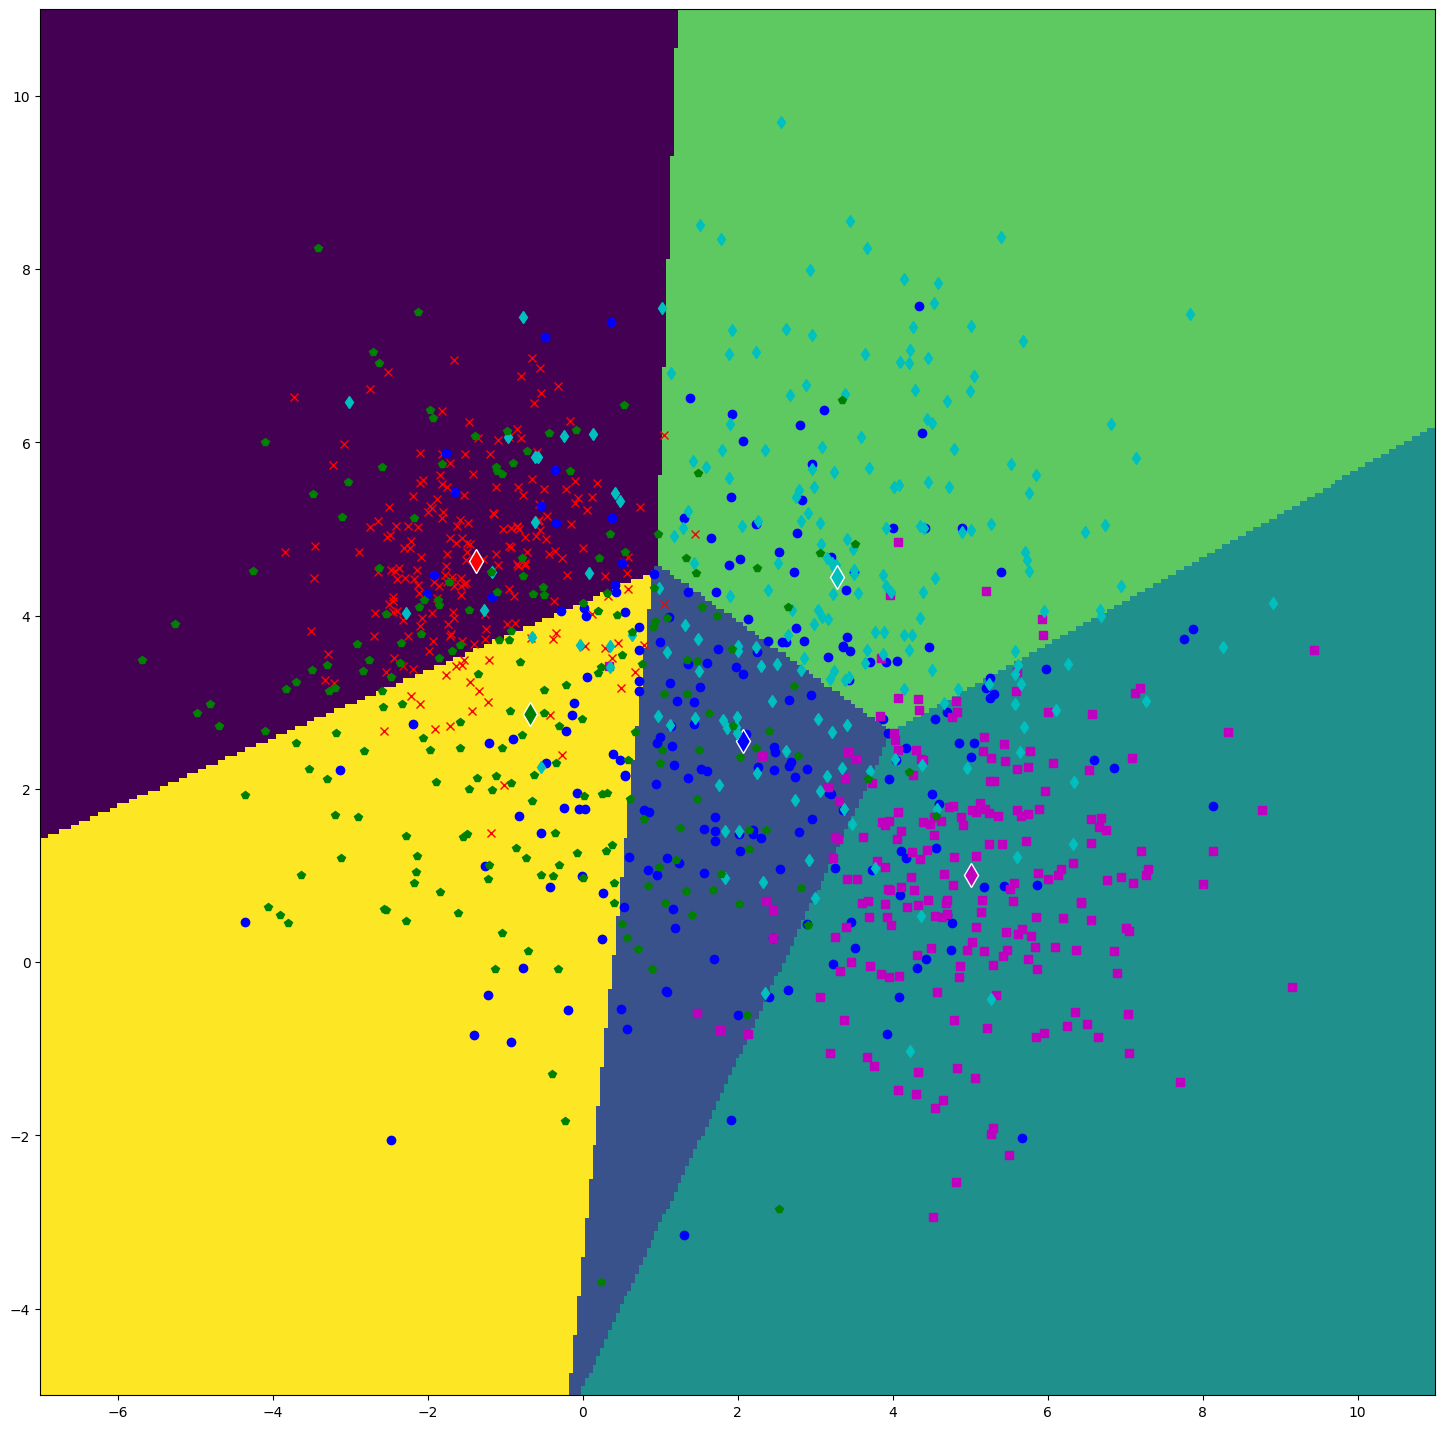

In [9]:
nmc_2features.plotDecisionBoundaries_2(training=X_train_2features_2, label_train=T_train, sample_mean=class_means_2features_2, fsize=(18,18))

### (c) i] For visualization, run it again using only the following 2 features: X3 and X7. Plot in 2D feature space: the training data, decision boundaries, and decision regions for all the classes.

In [10]:
nmc_2features = nearestMeansClassifier.NearestMeansClassifier()

feature1 = 3
feature2 = 7
X_train, n_train, T_train = nmc_2features.generateData(data=train_data)

X_train_2features_3 = nmc_2features.generateTrainDataWith2Features(feature1, feature2, X_train, printFlag=True)

class_means_2features_3 = nmc_2features.calculateClassMeans(X=X_train_2features_3)
print("---------------------------------------------------")
print(f"  Shape of sample_means: {class_means_2features_3.shape}")
print(f"  Sample Means: ")
print(class_means_2features_3)
print("---------------------------------------------------")

Y_hat_train_2features_3 = nmc_2features.classify(X=X_train_2features_3, sample_means=class_means_2features_3)

CER_train_2features_3 = nmc_2features.calculateCER(T=T_train, Y_hat=Y_hat_train_2features_3, percentageFlag=True)

accuracy_train_2features_3 = nmc_2features.calculateAccuracy(T=T_train, Y_hat=Y_hat_train_2features_3, percentageFlag=True)

print(f"Classification Error Rate for the training set of dataset-1 is: {CER_train_2features_3}%")
print(f"Accuracy for the training set of dataset-1 is: {accuracy_train_2features_3}%")

---------------------------------------------------
  Shape of Input Data: (1050, 8)
  Number of Data Points: 1050
  Number of Input Features: 7
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  After retaining only 2 features [3 and 7]: 
  Shape of X_train_2_features: (1050, 2)
  Number of Data Points: 1050
  Number of Input Features: 2
  Number of Target Classes: 5
---------------------------------------------------
---------------------------------------------------
  Shape of sample_means: (5, 2)
  Sample Means: 
[[-1.37040891 -0.48377135]
 [ 2.07045979 -1.5393723 ]
 [ 5.01696957  0.19203977]
 [ 3.28154766  3.26751149]
 [-0.67844556  1.24928872]]
---------------------------------------------------
Classification Error Rate for the training set of dataset-1 is: 32.38095238095238%
Accuracy for the training set of dataset-1 is: 67.61904761904762%


### c] ii] Plotting Decsision Boundaries for the X_train_2features_2 (X3 and X7)

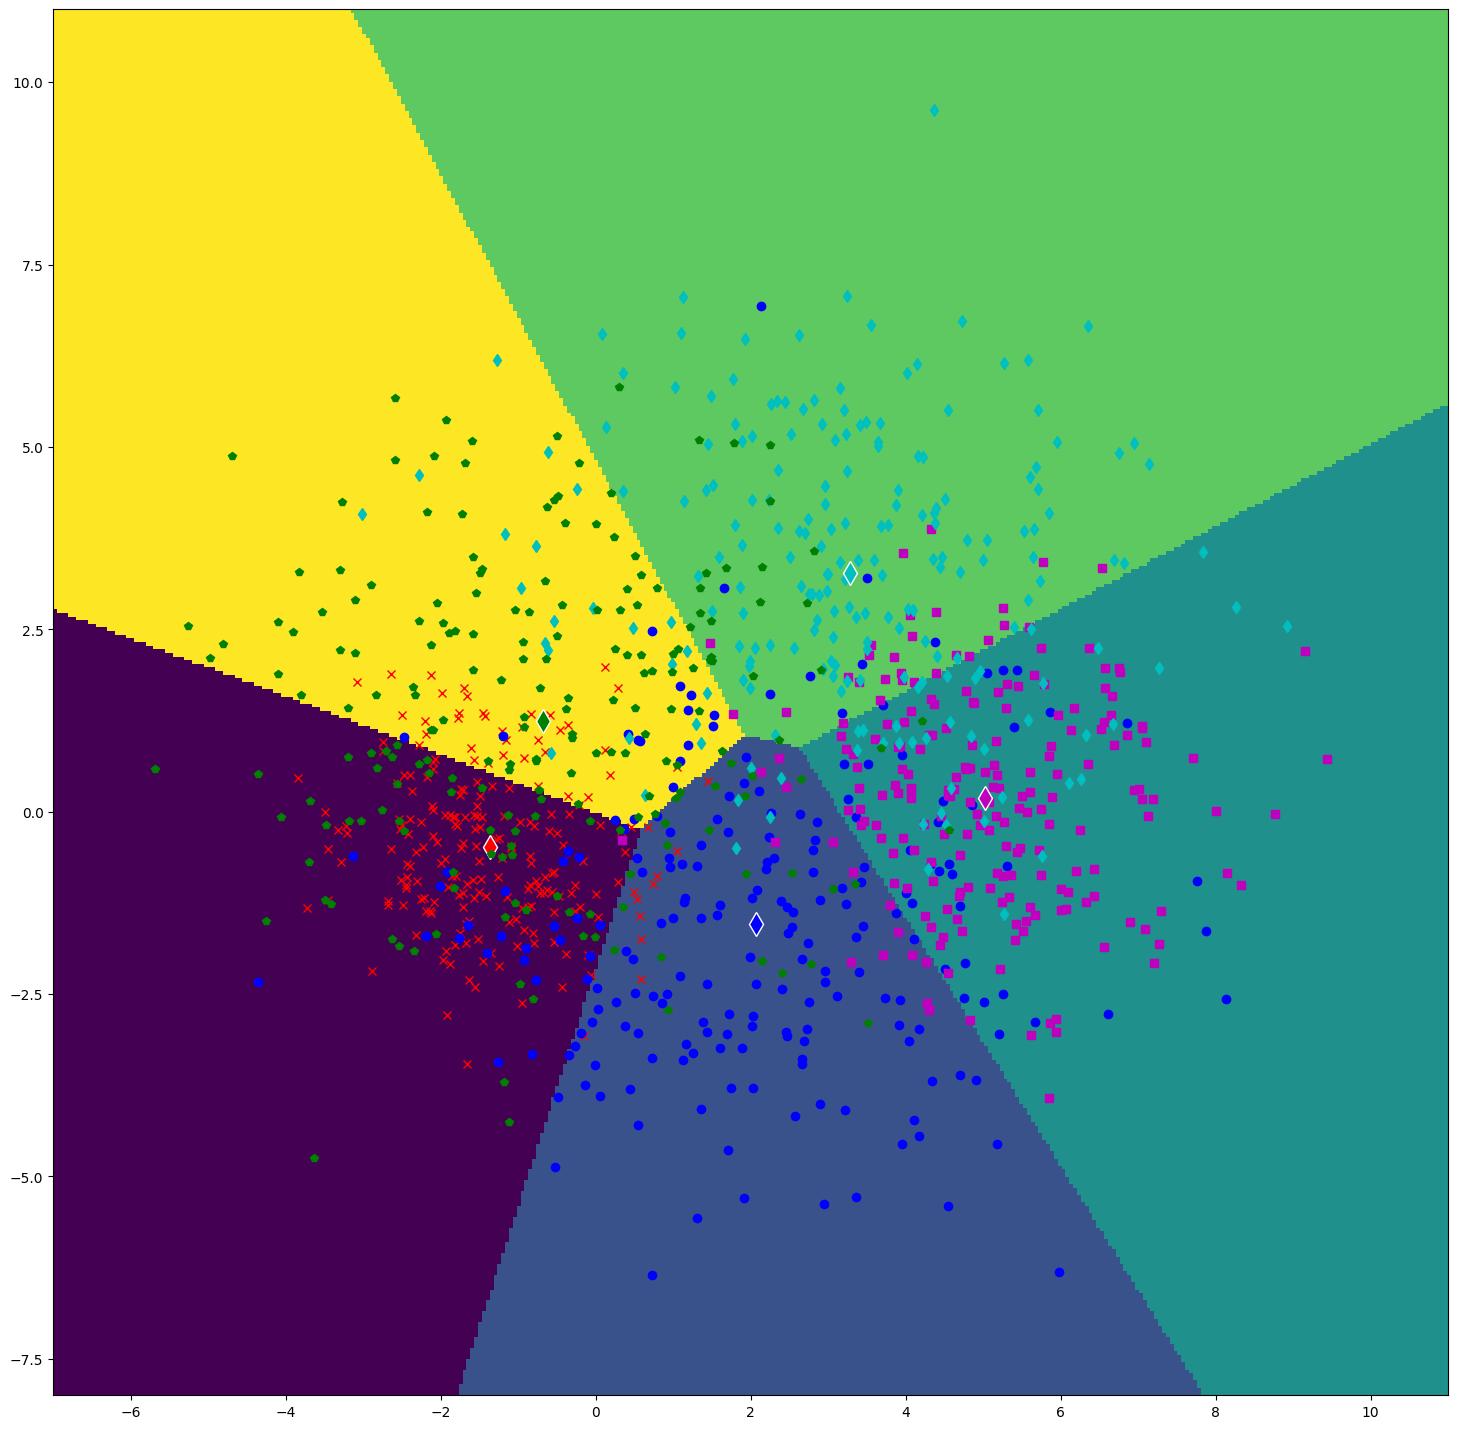

In [11]:
nmc_2features.plotDecisionBoundaries_2(training=X_train_2features_3, label_train=T_train, sample_mean=class_means_2features_3, fsize=(18,18))